## A nb for testing and viewing the effeciveness of unet models predictions 

This nb contains: 
- a way to crop and save images based on the mask
- a viewer to see images 
-  

In [32]:
#imports and prep

import cv2
import os

##---------file handling utils---------------------
def getPath(file):
    '''uses a path string to get just the directoy of a file'''
    strOut = ''
    i = 1
    while file[-i] != '/':
        i = i + 1
        #print(file[-i])
    strOut = file[0:len(file)-(i-1)]
    return strOut

def getName(file):
    '''uses a path string to get the name of a file'''
    strOut = ''
    i = 1
    while file[-i] != '/':
        i = i + 1
        #print(file[-i])
    strOut = file[-(i-1):]
    return strOut

### 1. Masking images based on predicted masks

In [33]:
#---------img operations-------------------------------

def crop_by_mask(image,mask,output_path):
    """
    takes in an image, and a corresponding binary mask and saves new file of image 
    values only on pixels where mask was positive. 

    Parameters:
    image (str): a string of path to image.
    mask (str): a string og path to mask 

    Returns:
    saves file to image_path/image_name.paint_only.png
    """
    img = cv2.imread(image)
    mask = cv2.imread(mask)
    output_path = output_path
    image_name = getName(image)

    # Convert the image to grayscale
    gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the mask
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No contours found in the mask.")
        return

    # Find the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the image based on the bounding box
    #cropped_image = img[y:y+h, x:x+w]

    # Create a mask of the cropped region
    #cropped_mask = mask[y:y+h, x:x+w]

    # Apply the mask to the cropped image
    #result = cv2.bitwise_and(cropped_image, cropped_image, mask=cropped_mask)
    result = cv2.bitwise_and(img,img,mask=binary)

    # Save the result to the output path
    #cv2.imwrite(output_path+image_name[:-4]+".paint_masked.png", result)
    #cv2.imshow('crop',result)
    #cv2.waitKey(5000)
    #cv2.destroyAllWindows()
    print(f"Cropped image saved to: {output_path+image_name[:-4]}.paint_masked.png")



Example callings of crop_by_mask

In [6]:

# Example usage

image_path = "/home/lqmeyers/paintDetect/images/testing/f17x2022_06_28.mp4.track000206.frame006589.jpg"
true_mask_path = "/home/lqmeyers/paintDetect/masks/testing/f17x2022_06_28.mp4.track000206.frame006589.Paint.png"
#crop_by_mask(image_path,mask_path,output_path=getPath(image_path))

#----other test functions------
#print(os.path.basename(image_path))

f17x2022_06_28.mp4.track000206.frame006589.jpg


In [ ]:
import os
#Run through a folder and save all the crops as above

image_folder = "/home/lqmeyers/paintDetect/images/training/"
true_mask_folder = "/home/lqmeyers/paintDetect/masks/training/"
pred_mask_folder = '/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/'


dir_list = os.walk(image_folder)
for root, dirs, files in dir_list:
    for f in files: 
        #print(f)
        #print(root[0:-16]+'masks/training/'+f[:-4]+'.Paint.png')
        #print(pred_mask_folder+f[:-4]+'.pred.jpg')
        crop_by_mask(root+f,pred_mask_folder+f[:-4]+'.pred.jpg',pred_mask_folder)



### 2. Tools to view the predicted masks and image files using cv2

In [ ]:
#some tools to look at the predicted masks

import cv2 
import os

#Run through a folder 

image_folder = "/home/lqmeyers/paintDetect/images/training/"
true_mask_folder = "/home/lqmeyers/paintDetect/masks/training/"
pred_mask_folder = '/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/'


#a way to get all the files in a certan folder
dir_list = os.walk(pred_mask_folder)
for root, dirs, files in dir_list:
    for f in files: 
        print(f)
        if "paint_masked" not in f:
            image = cv2.imread(root+f)
            cv2.imshow('crop',image)
            cv2.waitKey(5000)
            cv2.destroyAllWindows()
        

### 3. Comparing predicted mask and true mask

In [34]:
#--- test image paths
image = "/home/lqmeyers/paintDetect/images/training/f6.3x2022_06_20.mp4.track000353.frame012451.jpg"
mask_true = "/home/lqmeyers/paintDetect/masks/training/f6.3x2022_06_20.mp4.track000353.frame012451.Paint.png"
mask_pred = "/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/f6.3x2022_06_20.mp4.track000353.frame012451.pred.jpg"

#---- relevant imports
import cv2
import numpy as np

#--- actual function 
def compare_masks(path1,path2,out_path):
    """
    takes in the paths to two masks and overlays them to produde a 
    new image that shows based on 4 colors where the images overlap.

    Parameters:
    path1 (str): a string of path to a binary mask.
    path2 (str): a string og path to a binary mask.  

    Returns:
    saves file to output_path/image_name.compare.png
    """

    # Load the binary masks
    #mask1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE) #this causes pixelation issues
    mask1 = cv2.imread(path1)
    mask2 = cv2.imread(path2)

    # Convert the image to grayscale
    mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    mask2 = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    ret, mask1 = cv2.threshold(mask1, 127, 255, cv2.THRESH_BINARY) 
    ret, mask2 = cv2.threshold(mask2, 127, 255, cv2.THRESH_BINARY) 
  
    # Ensure that both masks have the same shape
    mask1 = cv2.resize(mask1, (mask2.shape[1], mask2.shape[0]))

    # Define colors for each overlap condition
    colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Black, Blue, Green, Red

    # Create an empty image with 3 channels
    result = np.zeros((mask1.shape[0], mask1.shape[1], 3), dtype=np.uint8)

    # Compare the masks and assign colors based on the overlap conditions
    for i in range(mask1.shape[0]):
        for j in range(mask1.shape[1]):
            if mask1[i, j] == 0 and mask2[i, j] == 0:  # Neither mask has a pixel
                result[i, j] = colors[0]  # Black
            elif mask1[i, j] > 0 and mask2[i, j] == 0:  # Only mask1 has a pixel
                result[i, j] = colors[1]  # Blue
            elif mask1[i, j] == 0 and mask2[i, j] > 0:  # Only mask2 has a pixel
                result[i, j] = colors[2]  # Green
            else:  # Both masks have a pixel
                result[i, j] = colors[3]  # Red

    # Display the resulting image
    #cv2.imshow('Mask Comparison', result)
    #cv2.waitKey(1000)
    #cv2.destroyAllWindows()
    cv2.imwrite(out_path+os.path.basename(path1)[:-4]+".comparison.png",result) #need r'/' after dir when using os to get it

#-------- test calling 

#compare_masks(mask_pred,mask_true,os.path.dirname(mask_pred))

Create a mask commparison file for each predicted mask in a folder 

In [27]:
import cv2 
import os

#Run through a folder 

image_folder = "/home/lqmeyers/paintDetect/images/testing/"
true_mask_folder = "/home/lqmeyers/paintDetect/masks/testing/"
pred_mask_folder = '/home/lqmeyers/paintDetect/masks/predict_2023-05-21-15:25:46/'

#initialize a folder to store comparison images
save_dir = pred_mask_folder+'comparisons/'
os.mkdir(save_dir)

#for all files in predicted masks, compare them to their counterparts in true masks
dir_list = os.walk(pred_mask_folder)
for root, dirs, files in dir_list:
    for f in files: 
        if dirs == 'comparisons': #need to bug fix this
            pass
        #print(true_mask_folder+f[:-9]+".Paint.png")
        compare_masks(root+f,true_mask_folder+f[:-9]+".Paint.png",save_dir)
        
        

[ WARN:0@756.166] global loadsave.cpp:244 findDecoder imread_('/home/lqmeyers/paintDetect/masks/predict_2023-05-21-15:25:46/comparisonsf17x2022_06_28.mp4.track000186.frame005217.pred.comparison.png'): can't open/read file: check file path/integrity
[ WARN:0@756.166] global loadsave.cpp:244 findDecoder imread_('/home/lqmeyers/paintDetect/masks/testing/f17x2022_06_28.mp4.track000186.frame005217.pred.compa.Paint.png'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


### 4.View images and masks side by side 

f06x2022_06_28.mp4.track000115.frame001572.jpg


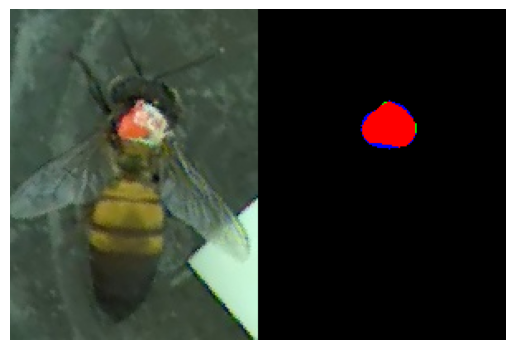

f06x2022_06_28.mp4.track000306.frame004886.jpg


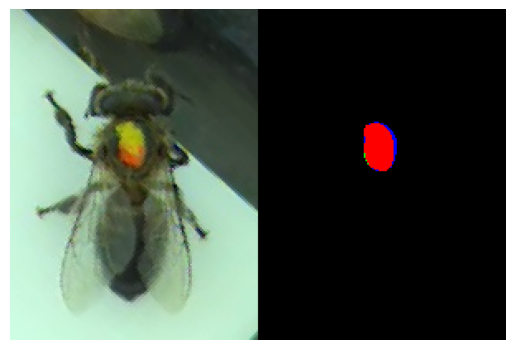

f06x2022_06_28.mp4.track000344.frame005720.jpg


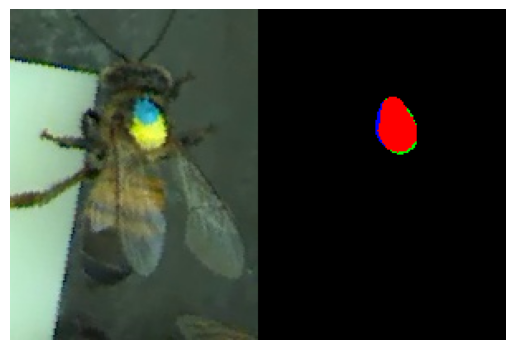

f06x2022_06_28.mp4.track000381.frame007837.jpg


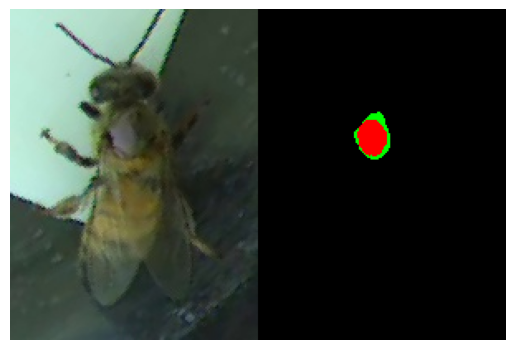

f06x2022_06_28.mp4.track000401.frame009363.jpg


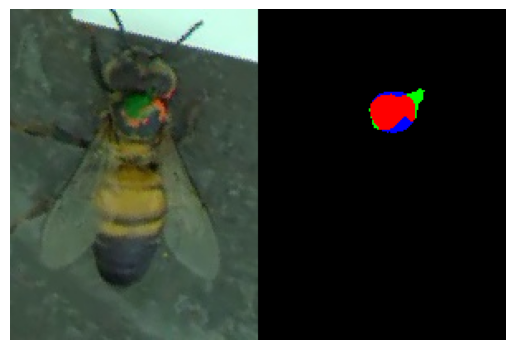

f06x2022_06_28.mp4.track000401.frame009373.jpg


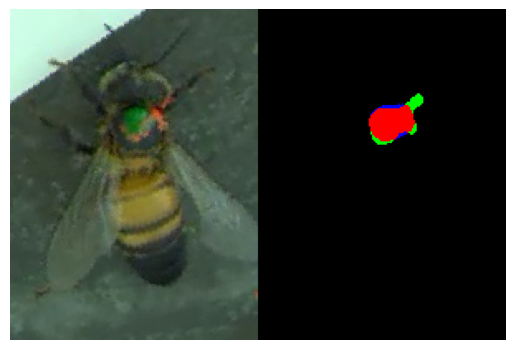

f06x2022_06_28.mp4.track000405.frame009773.jpg


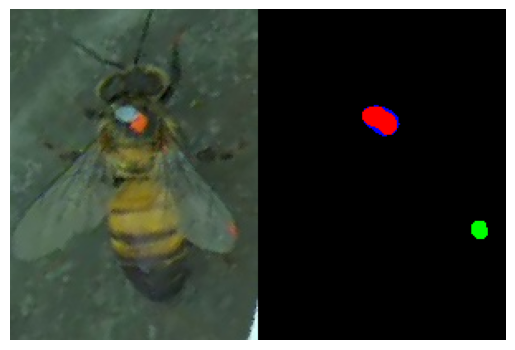

f08x2022_06_28.mp4.track000023.frame000404.jpg


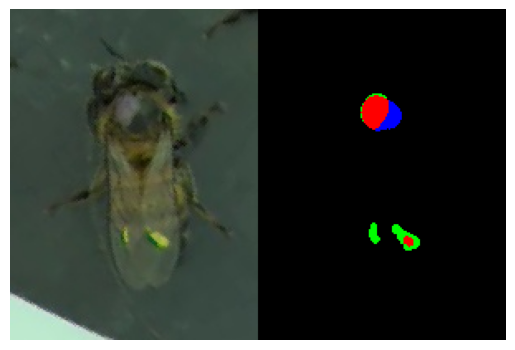

f08x2022_06_28.mp4.track000066.frame001176.jpg


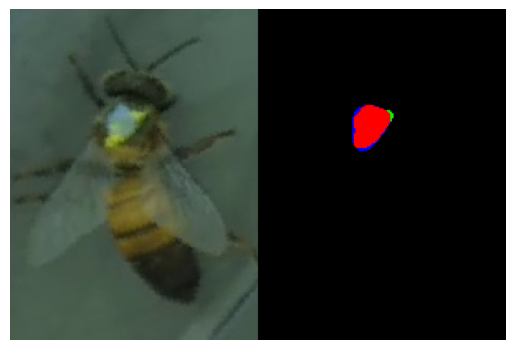

f08x2022_06_28.mp4.track000082.frame001515.jpg


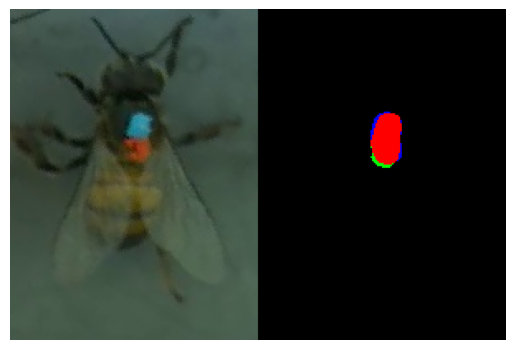

f08x2022_06_28.mp4.track000097.frame002154.jpg


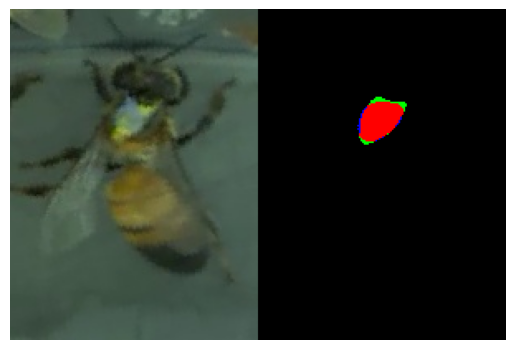

f09x2022_06_28.mp4.track000153.frame003162.jpg


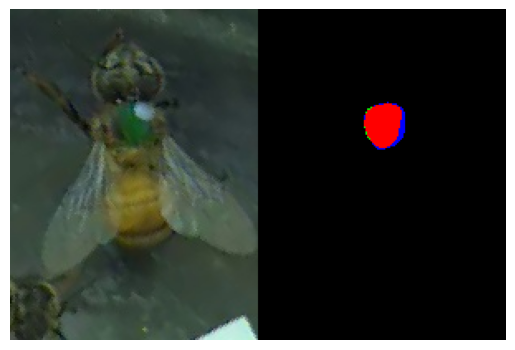

f09x2022_06_28.mp4.track000176.frame005081.jpg


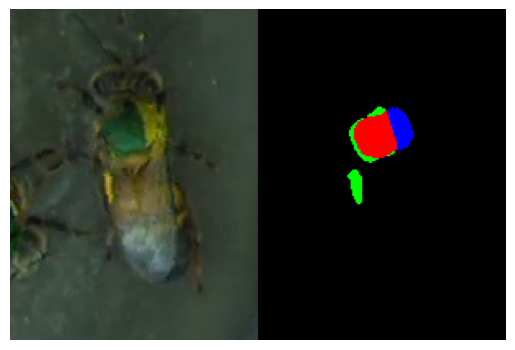

f09x2022_06_28.mp4.track000177.frame004381.jpg


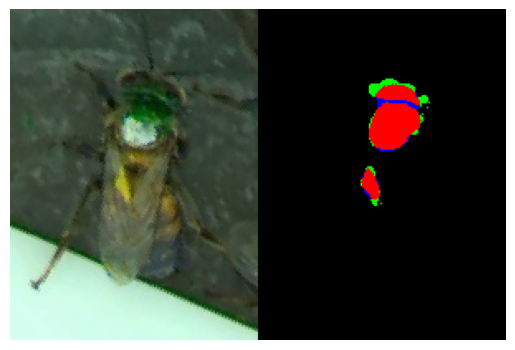

f09x2022_06_28.mp4.track000213.frame004190.jpg


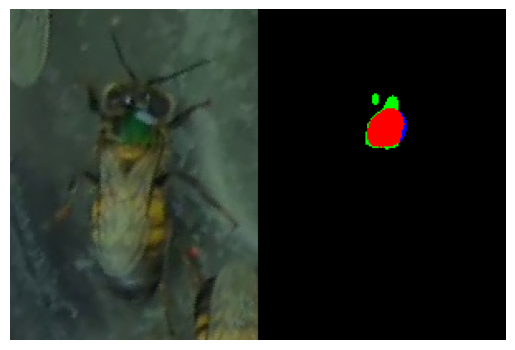

f09x2022_06_28.mp4.track000317.frame005743.jpg


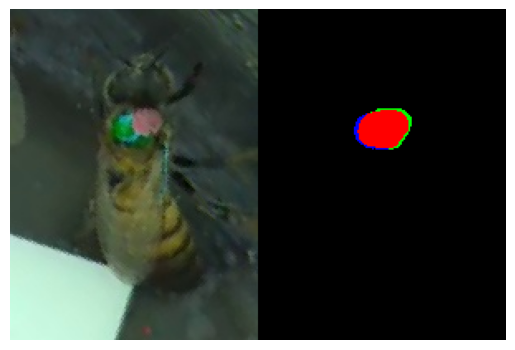

f09x2022_06_28.mp4.track000358.frame007107.jpg


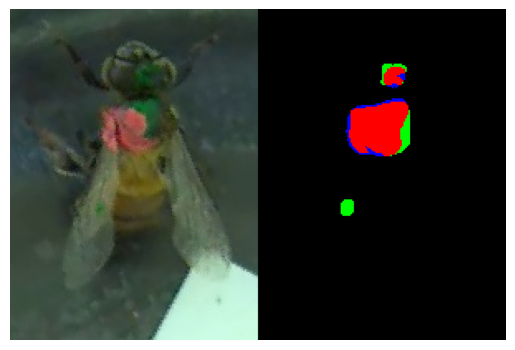

f09x2022_06_28.mp4.track000392.frame007378.jpg


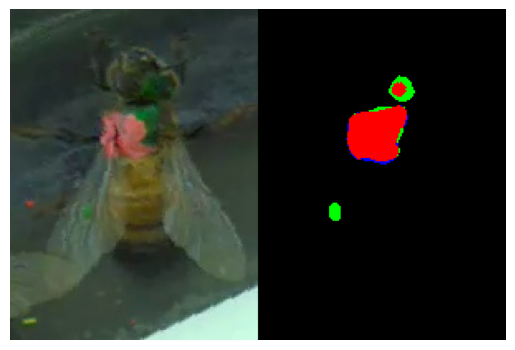

f1.1x2022_06_22.mp4.track000051.frame005260.jpg


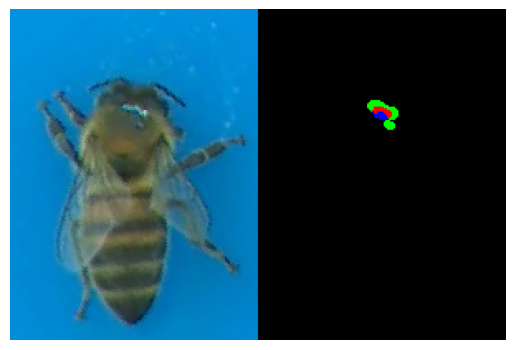

f1.2x2022_06_22.mp4.track000004.frame001173.jpg


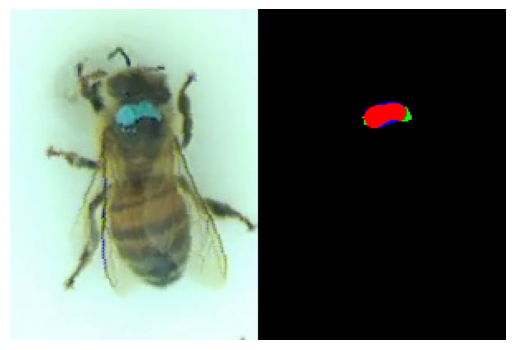

f10x2022_06_28.mp4.track000159.frame003861.jpg


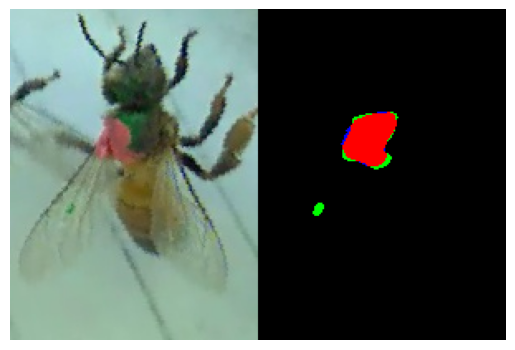

f10x2022_06_28.mp4.track000162.frame003997.jpg


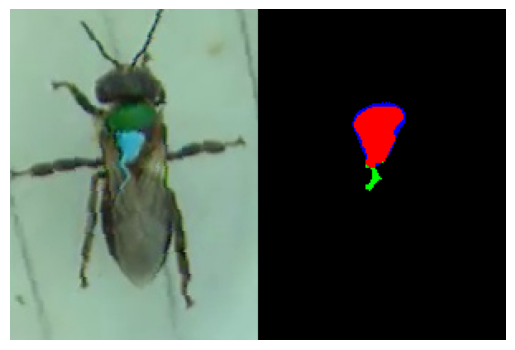

f10x2022_06_28.mp4.track000241.frame005264.jpg


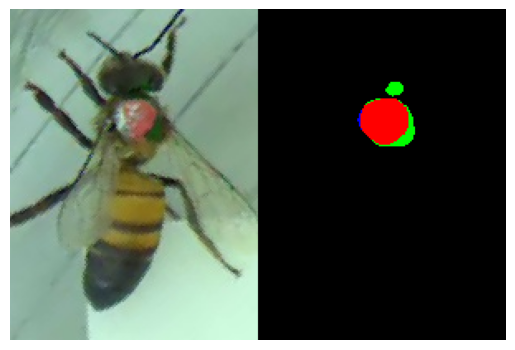

f13x2022_06_28.mp4.track000054.frame001458.jpg


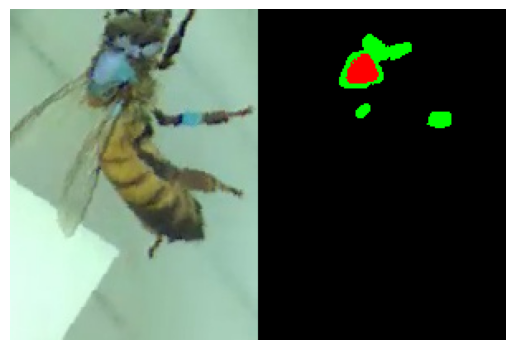

f13x2022_06_28.mp4.track000076.frame002641.jpg


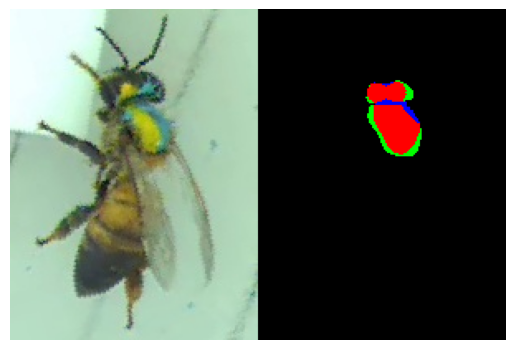

f13x2022_06_28.mp4.track000089.frame003021.jpg


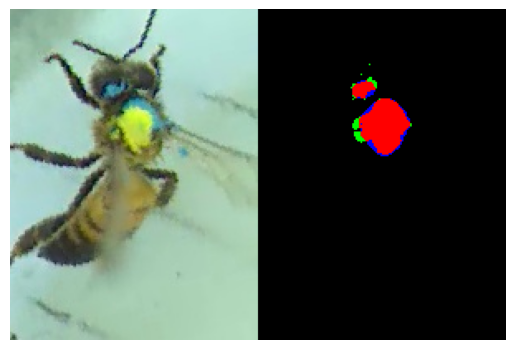

f13x2022_06_28.mp4.track000091.frame003218.jpg


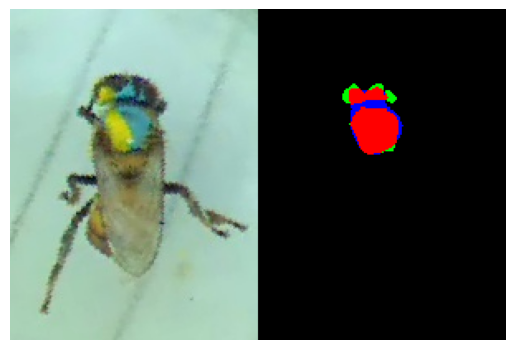

f13x2022_06_28.mp4.track000139.frame005261.jpg


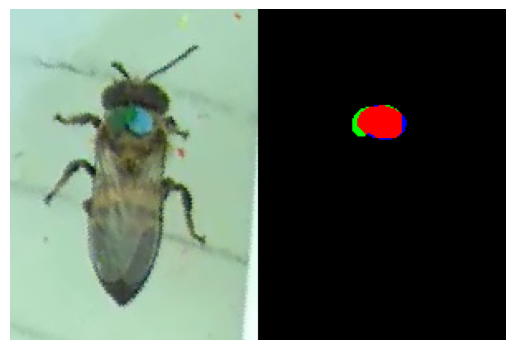

f13x2022_06_28.mp4.track000164.frame005619.jpg


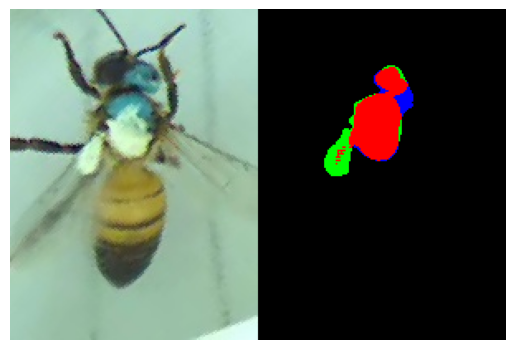

f15x2022_06_28.mp4.track000017.frame000574.jpg


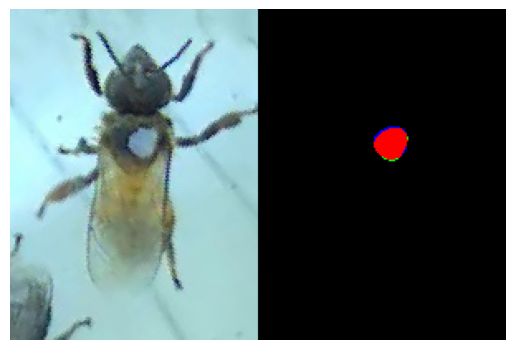

f15x2022_06_28.mp4.track000094.frame002076.jpg


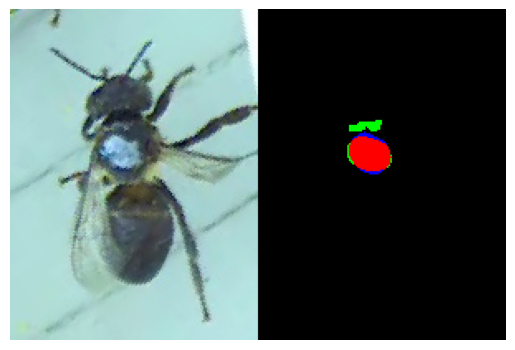

f15x2022_06_28.mp4.track000130.frame003418.jpg


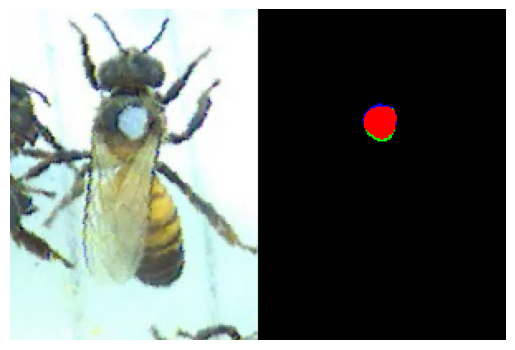

f15x2022_06_28.mp4.track000391.frame008134.jpg


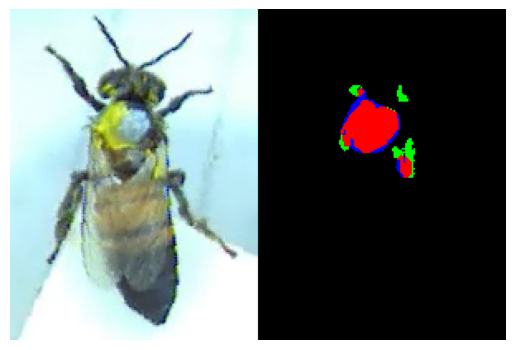

f17x2022_06_28.mp4.track000010.frame000706.jpg


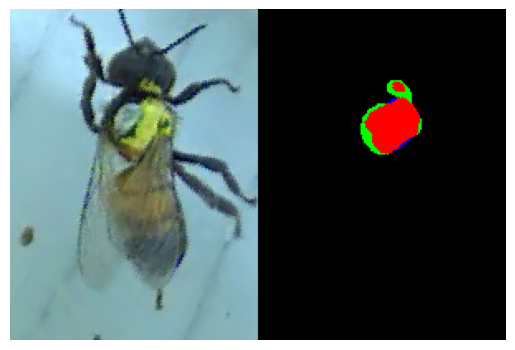

f17x2022_06_28.mp4.track000119.frame002489.jpg


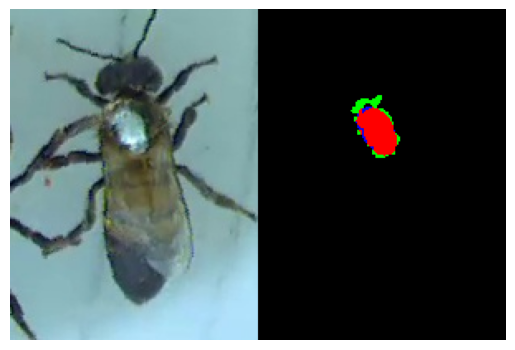

f17x2022_06_28.mp4.track000186.frame005217.jpg


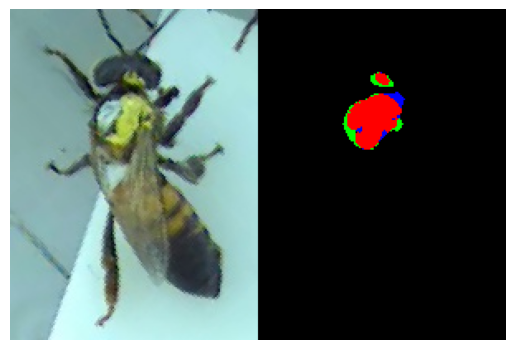

f17x2022_06_28.mp4.track000206.frame006589.jpg


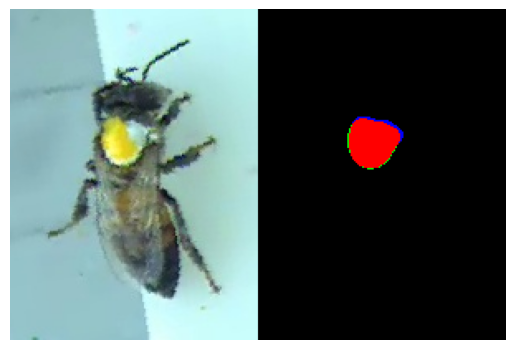

f17x2022_06_28.mp4.track000248.frame007250.jpg


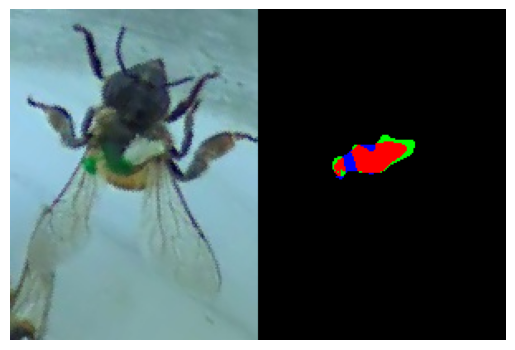

f19x2022_06_28.mp4.track000000.frame000041.jpg


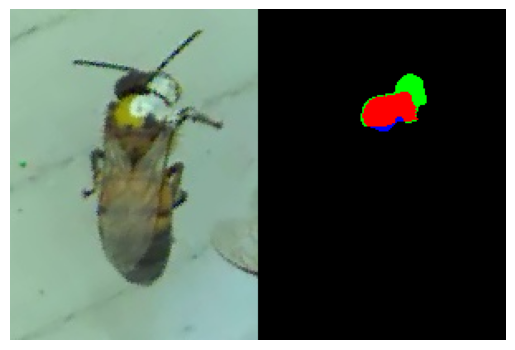

f19x2022_06_28.mp4.track000067.frame002560.jpg


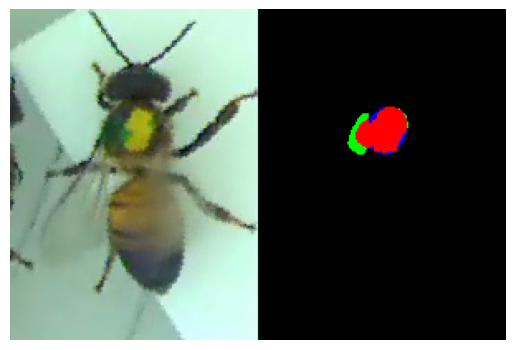

f19x2022_06_28.mp4.track000142.frame005399.jpg


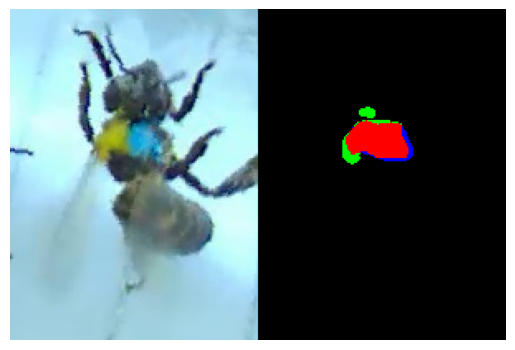

f21x2022_06_28.mp4.track000002.frame000011.jpg


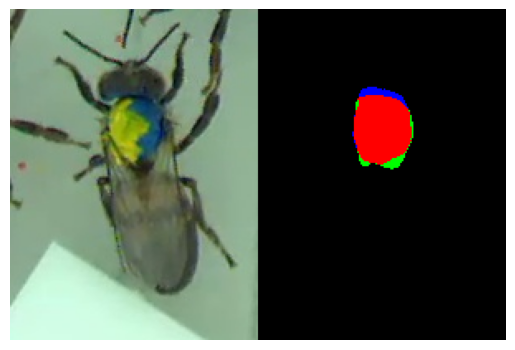

f21x2022_06_28.mp4.track000004.frame000197.jpg


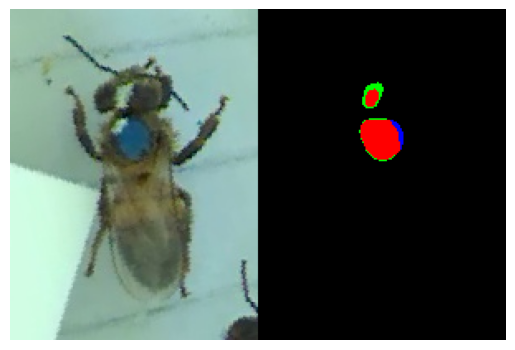

f21x2022_06_28.mp4.track000008.frame000398.jpg


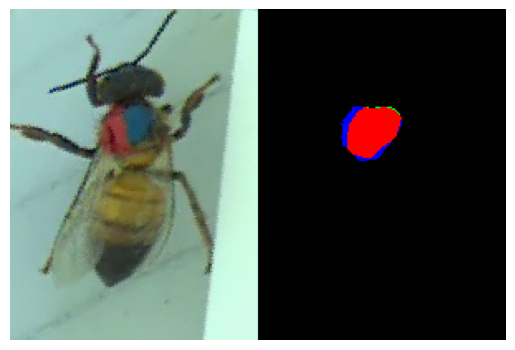

f21x2022_06_28.mp4.track000026.frame002984.jpg


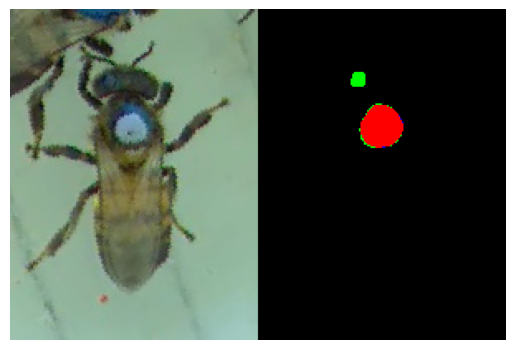

f21x2022_06_28.mp4.track000028.frame002113.jpg


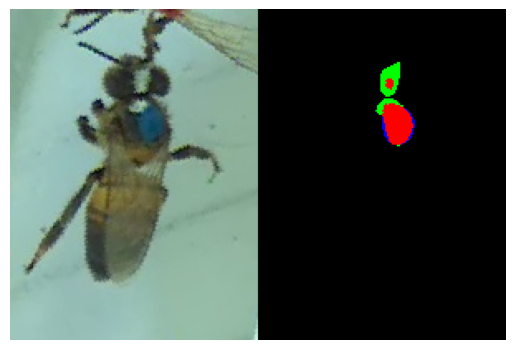

f22x2022_06_28.mp4.track000014.frame000541.jpg


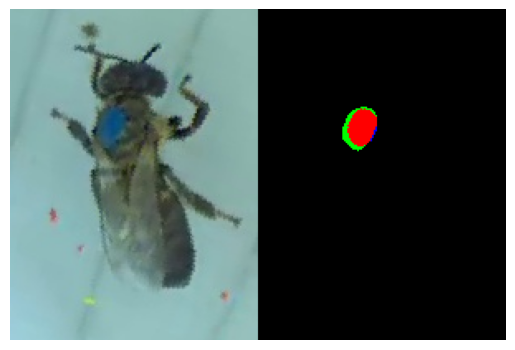

f22x2022_06_28.mp4.track000061.frame005009.jpg


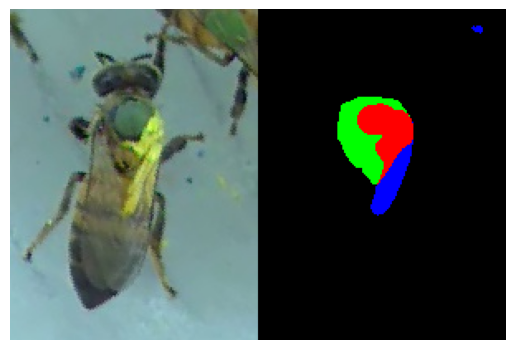

f22x2022_06_28.mp4.track000064.frame004998.jpg


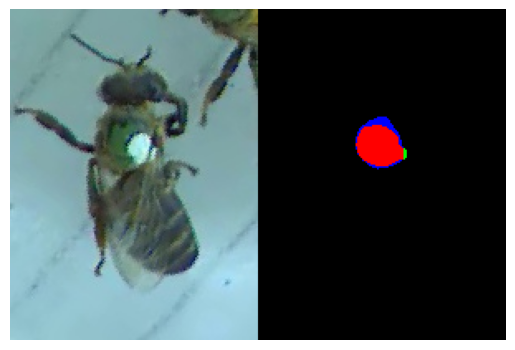

f2x2022_06_22.mp4.track000022.frame004129.jpg


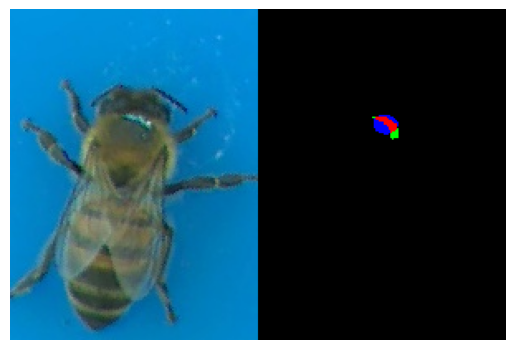

f2x2022_07_22.mp4.track000042.frame003450.jpg


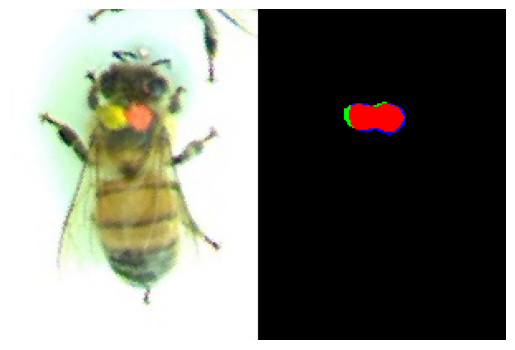

f3.1x2022_06_22.mp4.track000055.frame004944.jpg


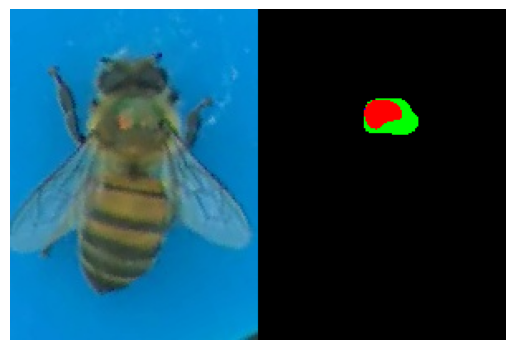

f3.1x2022_06_22.mp4.track000093.frame007395.jpg


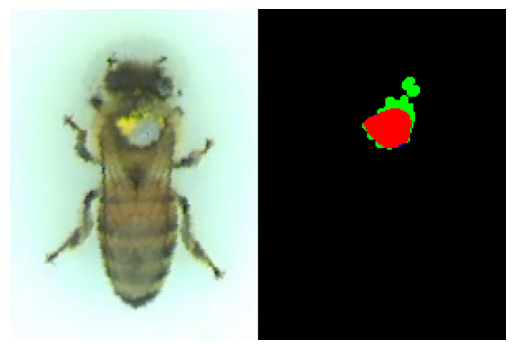

f3.2x2022_06_22.mp4.track000016.frame001551.jpg


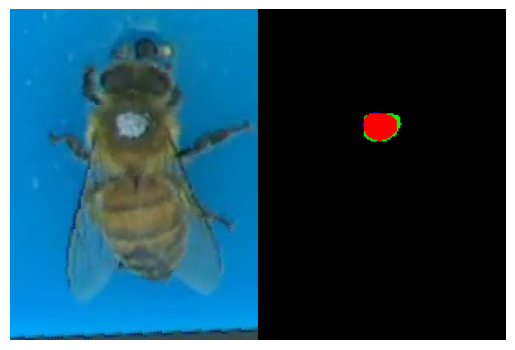

f3.2x2022_06_22.mp4.track000091.frame008154.jpg


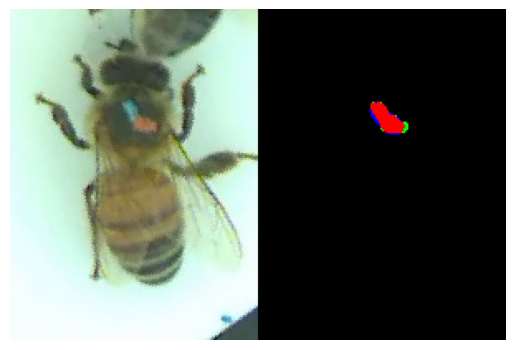

f3x2022_07_15.mp4.track000382.frame023662.jpg


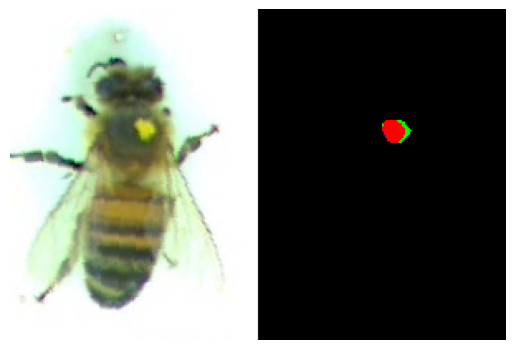

f3x2022_07_22.mp4.track000181.frame011176.jpg


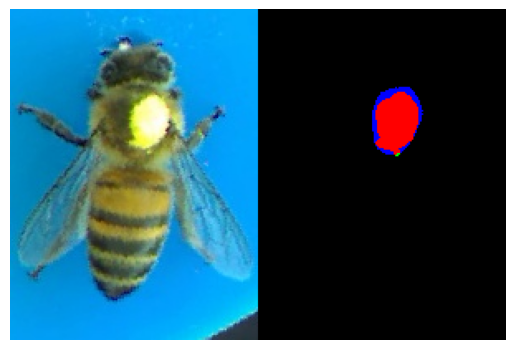

f3x2022_07_22.mp4.track000203.frame012029.jpg


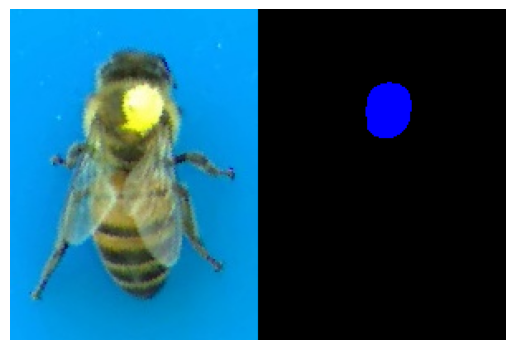

f4x2022_06_22.mp4.track000002.frame000900.jpg


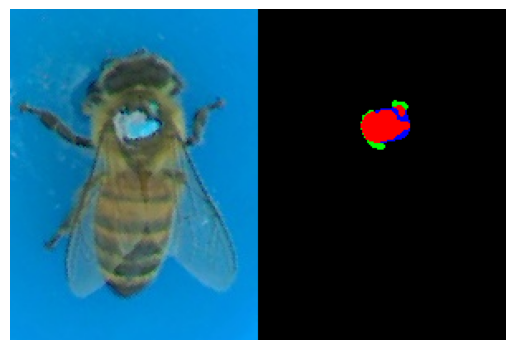

f5x2022_06_20.mp4.track000048.frame007552.jpg


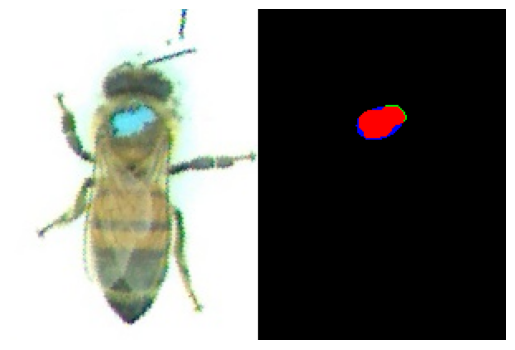

f5x2022_06_20.mp4.track000052.frame008426.jpg


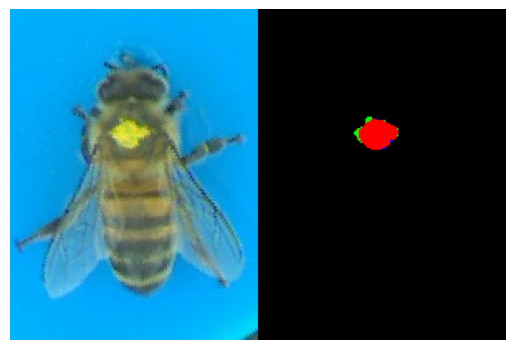

f6.2x2022_06_20.mp4.track000075.frame004534.jpg


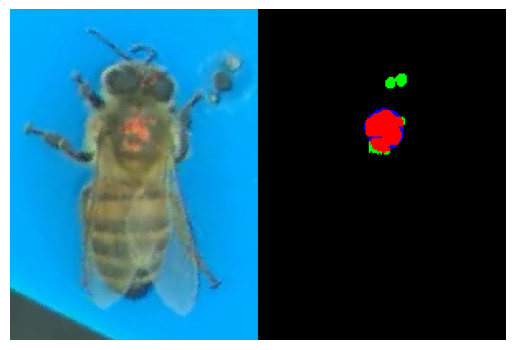

f6.2x2022_06_20.mp4.track000103.frame006098.jpg


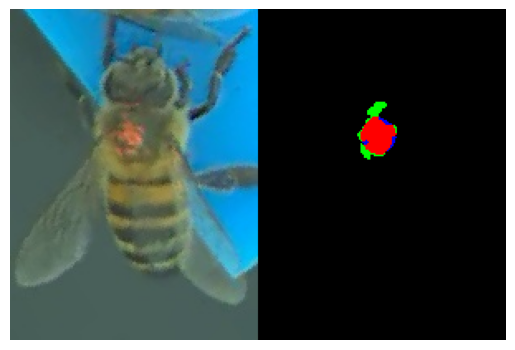

f6.3x2022_06_20.mp4.track000051.frame003132.jpg


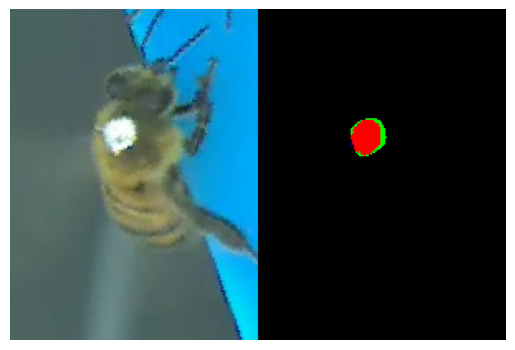

f6.3x2022_06_20.mp4.track000211.frame008645.jpg


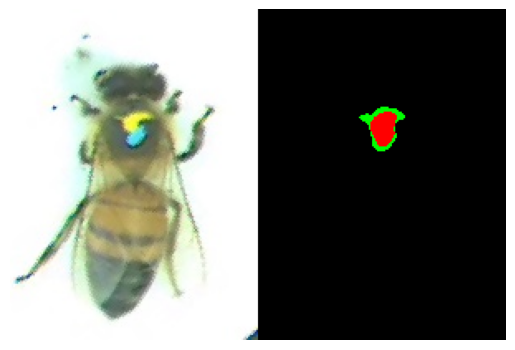

f6.3x2022_06_20.mp4.track000401.frame013679.jpg


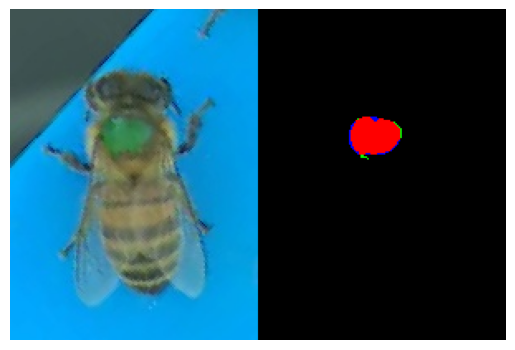

f7x2022_06_20.mp4.track000001.frame000321.jpg


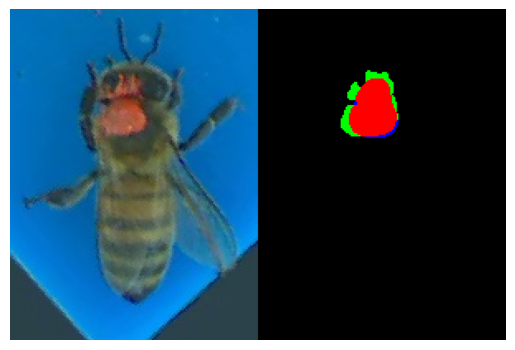

f7x2022_06_20.mp4.track000018.frame000241.jpg


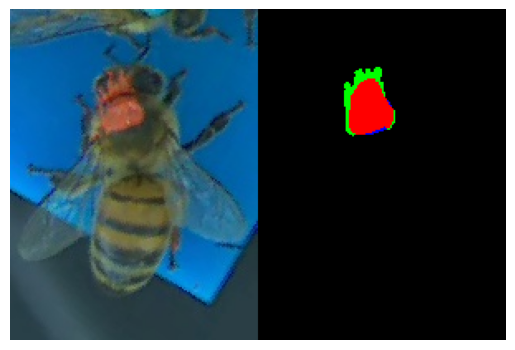

f7x2022_06_20.mp4.track000063.frame000967.jpg


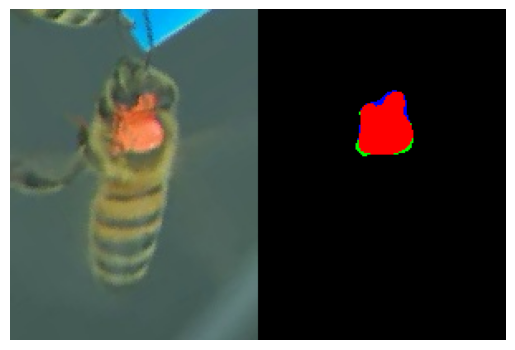

filesortf7x2022_06_20.mp4.track000051.frame000947.jpg


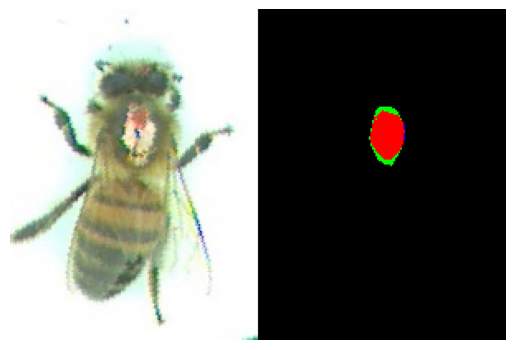

In [30]:
# code for viewing masks and images side by side 

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(image_dir1, image_dir2):
    # Get the list of image filenames in both directories
    filenames1 = os.listdir(image_dir1)
    filenames2 = os.listdir(image_dir2)

    # Sort the filenames to ensure correct matching
    filenames1.sort()
    filenames2.sort()

    # Loop over the image pairs and stitch them
    for filename1, filename2 in zip(filenames1, filenames2):
        # Load the images
        image1 = Image.open(os.path.join(image_dir1, filename1))
        image2 = Image.open(os.path.join(image_dir2, filename2))

        # Stitch the images horizontally
        stitched_image = np.concatenate((image1, image2), axis=1)

        # Display the stitched image
        print(filename1)
        plt.imshow(stitched_image)
        plt.axis('off')
        plt.show()

#stitch_images("./images/training/","/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/compar/")
stitch_images("./images/testing/","/home/lqmeyers/paintDetect/masks/predict_2023-05-21-15:25:46/comparisons")
